In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# turn off top and rigt axis line in matplotlib
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# change font size in matplolib
plt.rcParams.update({'font.size': 14})

# increasing the deafult DPI to improve resolution
#plt.rcParams['figure.dpi']= 50 # for preview
plt.rc("savefig", dpi = 300) # for saving

In [83]:
# Import labelled tweet data

files = {}
names = ['df16', 'df17', 'df18', 'df19', 'df20']
year = [2016, 2017, 2018, 2019, 2020]

for i in names:
    files[i] = pd.read_excel(f"../../Data/BOX/utahlake_{year[names.index(i)]}_labeled_nolink_pn.xlsx").copy()

In [84]:
for i in files:
    
    # Select relevant column
    files[i] = files[i].loc[:,["time","positive or negative?"]].copy()
    
    # Convert label values to lowercase
    files[i]['positive or negative?'] = files[i]['positive or negative?'].str.lower()
    
    # Check column info
    files[i].info()
    
    # Make new columns for positive and negative sentiment tweets
    # to add 1 in column 'neg' if a tweet is negative
    # and add 1 in column in 'pos' if a tweet is positive
    files[i]['neg'] = files[i]['positive or negative?'].str.count('n')
    files[i]['pos'] = files[i]['positive or negative?'].str.count('p')
    
    # Join each year data
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   622 non-null    datetime64[ns]
 1   positive or negative?  215 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 9.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   570 non-null    datetime64[ns]
 1   positive or negative?  159 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 -----------

In [89]:
# Concatenate all the dataframes row-wise
tweets = pd.concat([files['df16'], files['df17'], files['df18'],
                   files['df19'], files['df20']], ignore_index=True)

In [91]:
# Sum tweets in 1 day by sentiment
tweets = tweets.groupby([pd.Grouper(key='time', freq='D')])[tweets.columns[2:]].sum()

In [92]:
tweets.head()

,neg,pos
time,,
2016-01-01,0.0,0.0
2016-01-02,0.0,0.0
2016-01-03,0.0,0.0
2016-01-04,0.0,0.0
2016-01-05,0.0,0.0


In [146]:
############ add more variable types like % stuff


# Daily tweets

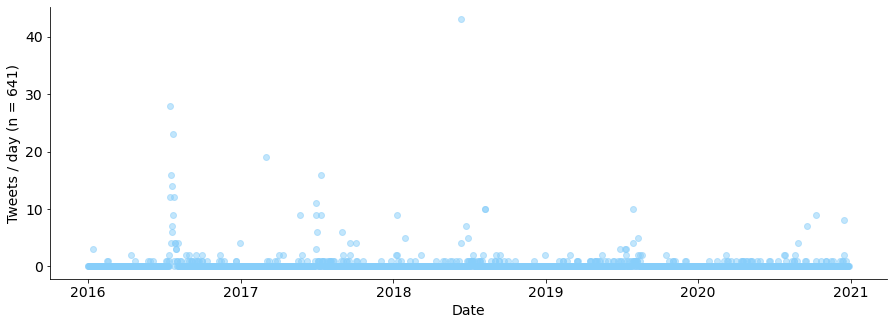

In [122]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets.index, tweets.neg, color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Tweets / day (n = {sum(tweets.neg):.0f})');
#ax.set_ylim([0,10]);

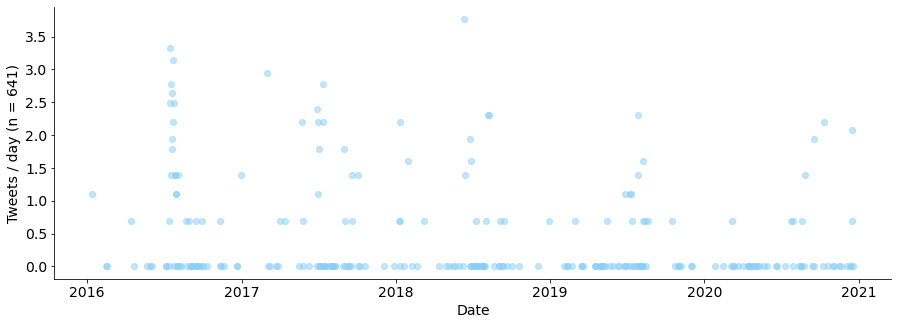

In [123]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets.index, np.log(tweets.neg), color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Tweets / day (n = {sum(tweets.neg):.0f})');
#ax.set_ylim([0,10]);

[Text(0.5, 0, 'Tweets / day'), Text(0, 0.5, 'Number of observations (n=641)')]

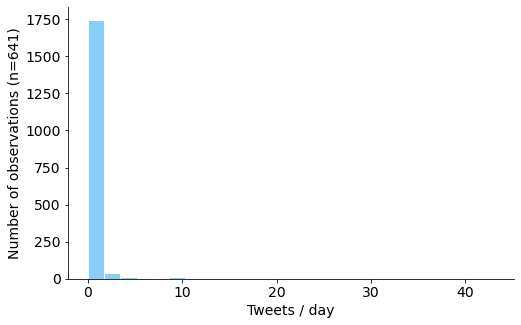

In [144]:
# Plot histogram to see distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(tweets.neg, bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Tweets / day', ylabel=f'Number of observations (n={sum(tweets.neg):.0f})')
#ax.set_ylim([0,10]);

In [136]:
# Before log transforming, add a small number to zero values
tweets_log = tweets.copy()
tweets_log = tweets_log.mask(tweets_log==0)

,neg,pos
time,,
2016-01-01,NaN,NaN
2016-01-02,NaN,NaN
2016-01-03,NaN,NaN
2016-01-04,NaN,NaN
2016-01-05,NaN,NaN


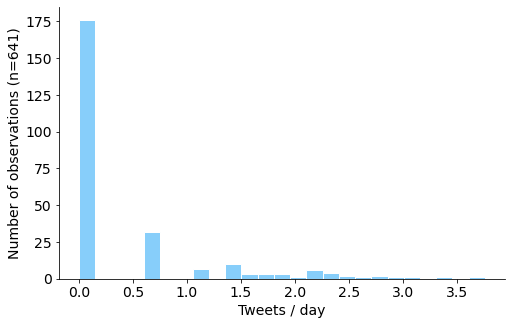

In [145]:
# Plot histogram to see distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(np.log(tweets_log.neg), bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Tweets / day', ylabel=f'Number of observations (n={sum(tweets.neg):.0f})');
#ax.set_ylim([0,10]);

In [19]:
# df16 = pd.read_excel("../../Data/BOX/utahlake_2016_labeled_nolink_pn.xlsx")
# df17 = pd.read_excel("../../Data/BOX/utahlake_2017_labeled_nolink_pn.xlsx")
# df18 = pd.read_excel("../../Data/BOX/utahlake_2018_labeled_nolink_pn.xlsx")
# df19 = pd.read_excel("../../Data/BOX/utahlake_2019_labeled_nolink_pn.xlsx")
# df20 = pd.read_excel("../../Data/BOX/utahlake_2020_labeled_nolink_pn.xlsx")

# Check on 2016 dataframe

In [26]:
df16 = files['df16']

In [36]:
# Select relevant columns
df16 = df16.loc[:,["time","positive or negative?"]].copy()

In [28]:
# Convert label values to lowercase
df16['positive or negative?'] = df16['positive or negative?'].str.lower()

In [37]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   622 non-null    datetime64[ns]
 1   positive or negative?  215 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 9.8+ KB


In [38]:
df16.head()

,time,positive or negative?
0,2016-12-31 04:27:41,n
1,2016-12-31 04:27:41,n
2,2016-12-31 04:27:34,n
3,2016-12-31 04:27:16,n
4,2016-12-29 20:51:45,NaN


In [52]:
df16['neg'] = 0

In [55]:
for i in df16.index:
    df16.loc[i,'neg'] = df16.loc[i,'positive or negative?'].str.count('n')
    #print(df16.loc[i,'positive or negative?'])

AttributeError: 'str' object has no attribute 'str'

In [58]:
# Make new columns for positive and negative sentiment tweets
# to add 1 in column 'neg' if a tweet is negative
# and add 1 in column in 'pos' if a tweet is positive
df16['neg'] = df16['positive or negative?'].str.count('n')
df16['pos'] = df16['positive or negative?'].str.count('p')

In [59]:
df16.head()

,time,positive or negative?,pos,neg
0,2016-12-31 04:27:41,n,0.0,1.0
1,2016-12-31 04:27:41,n,0.0,1.0
2,2016-12-31 04:27:34,n,0.0,1.0
3,2016-12-31 04:27:16,n,0.0,1.0
4,2016-12-29 20:51:45,NaN,NaN,NaN


In [60]:
# group by each day
df16 = df16.groupby([pd.Grouper(key='time', freq='D')])[df16.columns[2:]].sum()

In [63]:
df16.head(50)

,pos,neg
time,,
2016-01-01,0.0,0.0
2016-01-02,0.0,0.0
2016-01-03,0.0,0.0
2016-01-04,0.0,0.0
2016-01-05,0.0,0.0
2016-01-06,0.0,0.0
2016-01-07,0.0,0.0
2016-01-08,0.0,0.0
2016-01-09,0.0,0.0


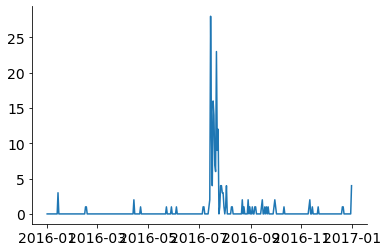

In [64]:
plt.plot(df16.neg);

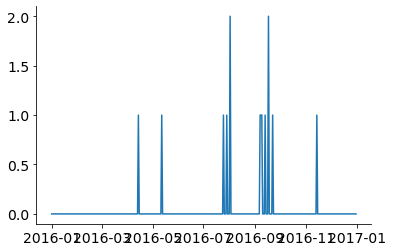

In [66]:
plt.plot(df16.pos);